In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('thyroid.csv')
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [5]:
cols_to_encode = ['Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function','Physical Examination','Adenopathy','Pathology','Focality','Risk','T','N','M','Stage','Response','Recurred']
oe = OrdinalEncoder()
df[cols_to_encode] = oe.fit_transform(df[cols_to_encode])
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0.0,0.0,0.0,0.0,2.0,3.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
1,34,0.0,0.0,1.0,0.0,2.0,1.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,30,0.0,0.0,0.0,0.0,2.0,4.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
3,62,0.0,0.0,0.0,0.0,2.0,4.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
4,62,0.0,0.0,0.0,0.0,2.0,1.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1.0,1.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,0.0,6.0,2.0,1.0,4.0,0.0,1.0
379,81,1.0,1.0,0.0,1.0,2.0,1.0,1.0,3.0,0.0,0.0,6.0,2.0,1.0,4.0,3.0,1.0
380,72,1.0,1.0,1.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,6.0,2.0,1.0,4.0,3.0,1.0
381,61,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,6.0,2.0,0.0,3.0,3.0,1.0


In [7]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [9]:
x=df.iloc[:,:-1]
y=df['Recurred']
print(x)
print(y)

     Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0     27     0.0      0.0         0.0              0.0               2.0   
1     34     0.0      0.0         1.0              0.0               2.0   
2     30     0.0      0.0         0.0              0.0               2.0   
3     62     0.0      0.0         0.0              0.0               2.0   
4     62     0.0      0.0         0.0              0.0               2.0   
..   ...     ...      ...         ...              ...               ...   
378   72     1.0      1.0         1.0              1.0               2.0   
379   81     1.0      1.0         0.0              1.0               2.0   
380   72     1.0      1.0         1.0              0.0               2.0   
381   61     1.0      1.0         1.0              1.0               0.0   
382   67     1.0      1.0         0.0              0.0               2.0   

     Physical Examination  Adenopathy  Pathology  Focality  Risk    T    N  \
0        

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [12]:
y_pred=model.predict(x_test)

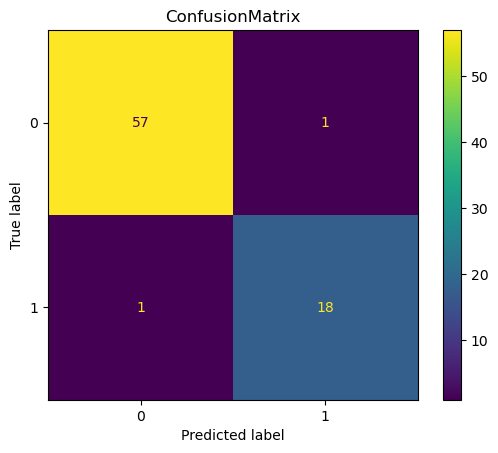

In [13]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("ConfusionMatrix")
plt.show()

In [16]:
acc_score=accuracy_score(y_test,y_pred)
acc_score

0.974025974025974